# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name:

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [13]:
# import statements
import pandas as pd
import seaborn as sns

In [14]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [15]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [16]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [19]:
#Question 1 Part A using code, show the nulls in the dataframe
null_counts = bostondata.isnull().sum()
null_counts[null_counts > 0]

,0
status_dttm,1
value,16782
description,247
violation_sthigh,12534
violation_suffix,144
violation_zip,2
contact_addr1,5
contact_addr2,13765
contact_city,2
contact_state,2


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

**Answer for Q1 Part B:** \

Remove rows where key fields, such as status_dttm or description, are clearly missing — these records do not provide enough information to be valuable.


Put numbers like year_built or month back in with a reasonable "middle" value (the median value for very skewed data, or the mean for data that is normally distributed).


For missing text fields (for example, owner_name, neighborhood), enter: "Unknown" in order to retain those records — we just want to know that the information is not known.


Carry-forward the last value in date-sequential data (this can be done using .ffill() or .bfill() methods) if it is reasonable to assume that the information is continuous.


Add a "null flag" column next to important fields — you are indicating one additional True/False flag per field — so that models can learn if "missingness" is important.


Merge in other sources (like building ownership or landlord registries) to enter year built or ownership information when applicable.


Use more advanced methods of imputation (K-NN, regression) only if too many gaps remain, even with simple filling.


Remove columns that are largely null (for example, more than 80%) since they will most likely be of no use.


In [18]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-18-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [20]:
# Question 2 code: lets get the value counts for our new column
month_counts = bostondata['month'].value_counts().sort_index()
month_counts

,count
month,
1.0,1181
2.0,1404
3.0,1721
4.0,1501
5.0,1594
6.0,1504
7.0,1421
8.0,1283
9.0,1649


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [22]:
#Question 3 code: statistical information
bostondata.describe()

,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [23]:
#Question 4 Part A Code: Value Counts
desc_pcts = (
    bostondata['description']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)
desc_pcts

,proportion
description,
Failure to Obtain Permit,24.57
Unsafe and Dangerous,21.92
Maintenance,9.80
Testing & Certification,5.41
Unsafe Structures,4.22
...,...
Grounding electrode conduction,0.01
Removal/Making Structure Safe,0.01
Use & Occupancy,0.01


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:
Failure to Obtain Permit: Owners/contractors commonly do not pull permits to save time and money, which means that work can happen without verifying safety or codes—inspectors know this is happening first.

Unsafe and Dangerous: Deferred maintenance (like exposed wire, broken railings, rotting wood) creates imminent dangers right now; life-safety hazards are at the top of the list for inspectors.

Maintenance: Maintenance needs—roof leaks, broken windows, clogged gutters, HVAC service—are routinely delayed, particularly in rental environments with tight budgets. Even the smallest part of deferred maintenance is a code violation.

## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

/tmp/ipython-input-25-3161132006.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


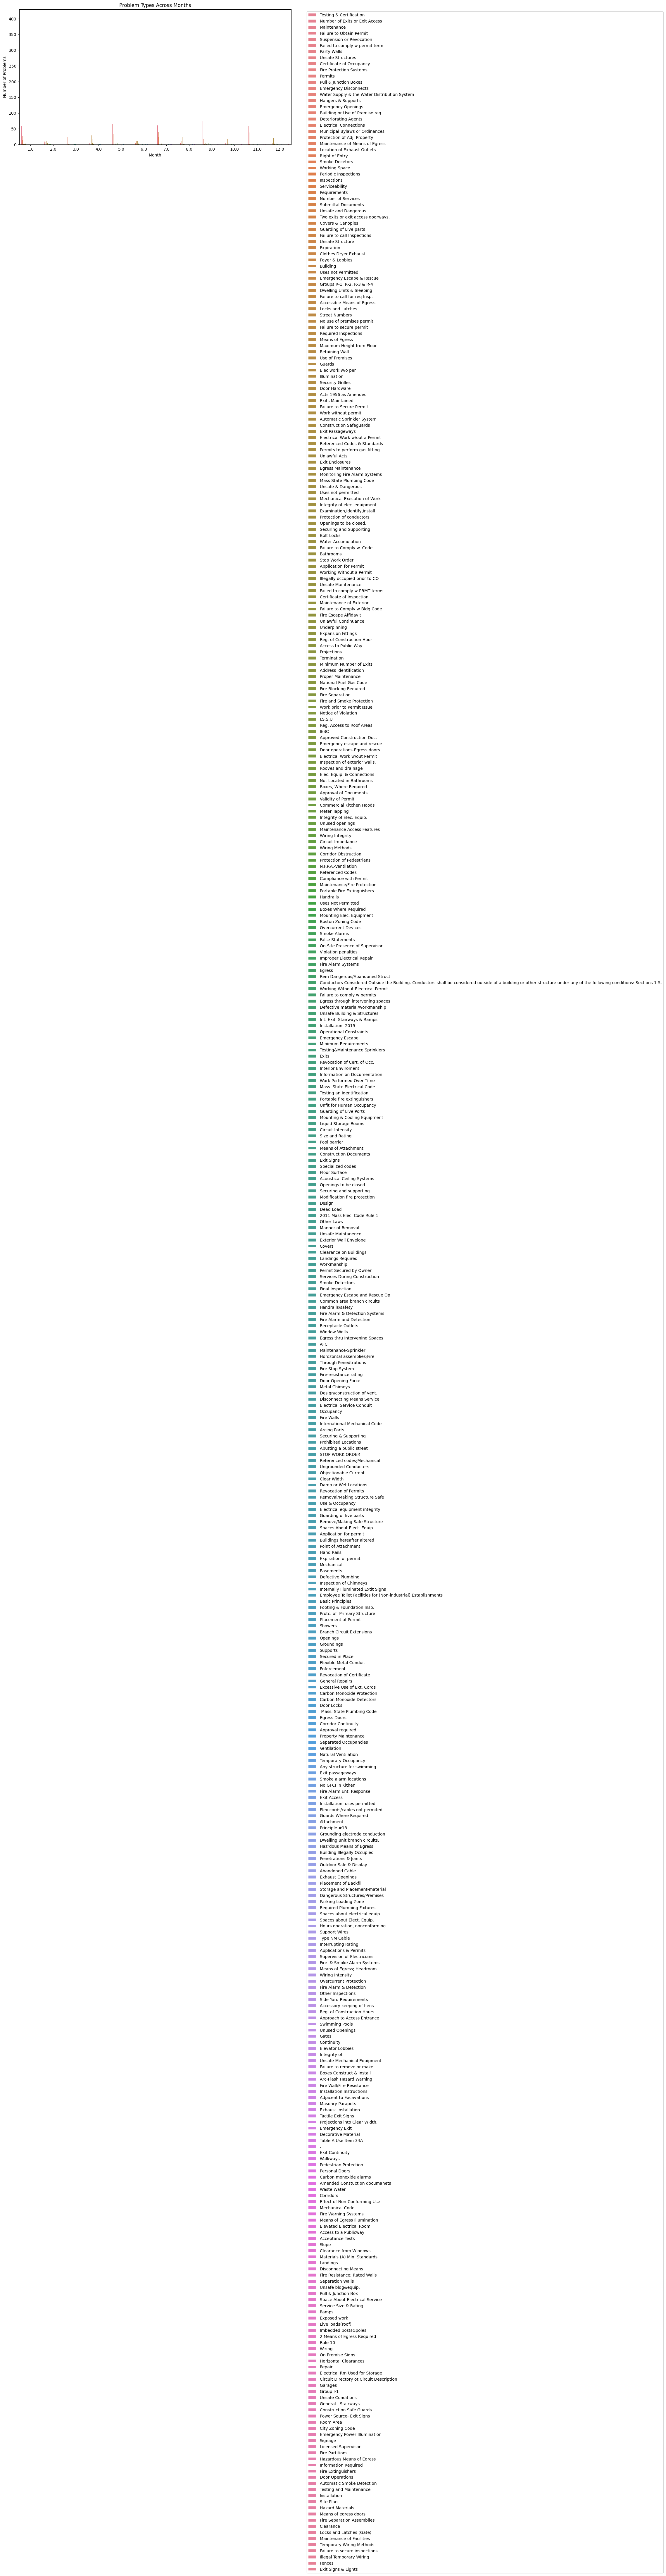

In [25]:
# Question 5: visualize problem types by month without a legend title
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='description', data=bostondata, dodge=True)
plt.xlabel('Month')
plt.ylabel('Number of Problems')
plt.title('Problem Types Across Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=None)
plt.tight_layout()
plt.show()


## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:
* **Summer peak overall:** Total problems rise steadily from May through August, peaking in July—likely related to additional inspections and weather-driven issues in warmer months.
* **"Unsafe and Dangerous" spike mid-year:** This life-safety category spikes March – August, when heat, storms, and deferred maintenance lead to hazards.
* **Spring issue rise called "Maintenance":** Routine issues, like leaks and broken fixtures, rise in March-April, mirroring typical spring maintenance cycles.
* **Steady "Failure to Obtain Permit":** "Failure to Obtain Permit" is high across nearly every month, only rising slightly through mid-year.
* **Winter lull for non-critical types:** All of the less-common problem types pretty much disappear in the coldest months, likely due to fewer inspections or weather restrictions for exterior work.

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [26]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [27]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

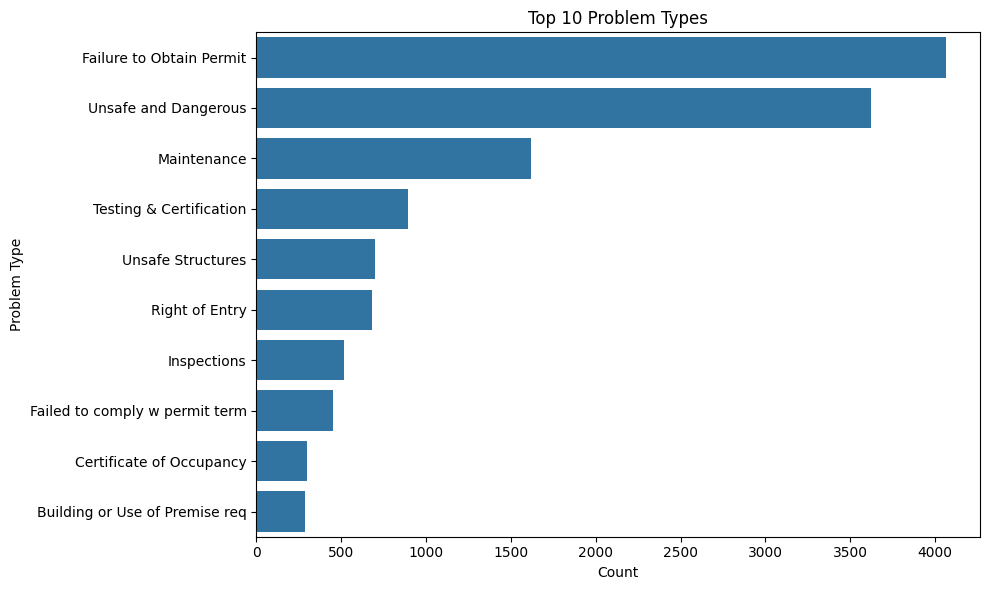

In [29]:
# Question 5 Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    y='description',
    data=bostondata,
    order=bostondata['description'].value_counts().index[:10]
)
plt.title('Top 10 Problem Types')
plt.xlabel('Count')
plt.ylabel('Problem Type')
plt.tight_layout()
plt.show()

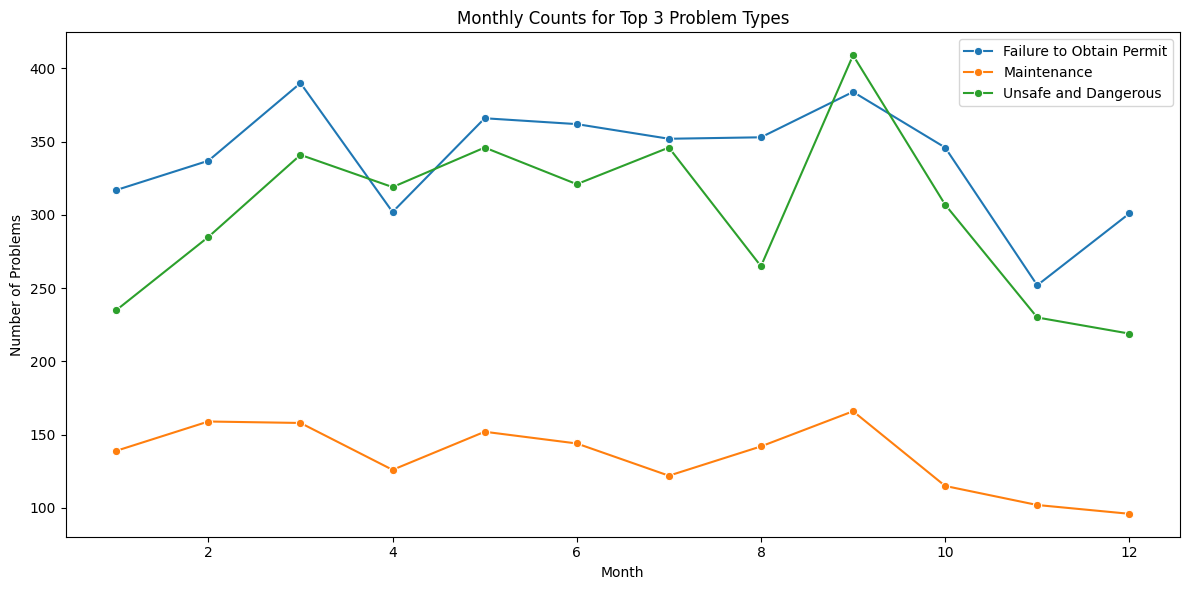

In [30]:
# Question 6 Visualization
# Q6: Monthly Trend for Top 3 Problems
import matplotlib.pyplot as plt

top3 = desc_pcts.head(3).index.tolist()
monthly_top3 = (
    bostondata[bostondata['description'].isin(top3)]
    .groupby(['month','description'])
    .size()
    .reset_index(name='count')
)
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_top3,
    x='month',
    y='count',
    hue='description',
    marker='o'
)
plt.title('Monthly Counts for Top 3 Problem Types')
plt.xlabel('Month')
plt.ylabel('Number of Problems')
plt.legend(title=None, loc='upper right')
plt.tight_layout()
plt.show()

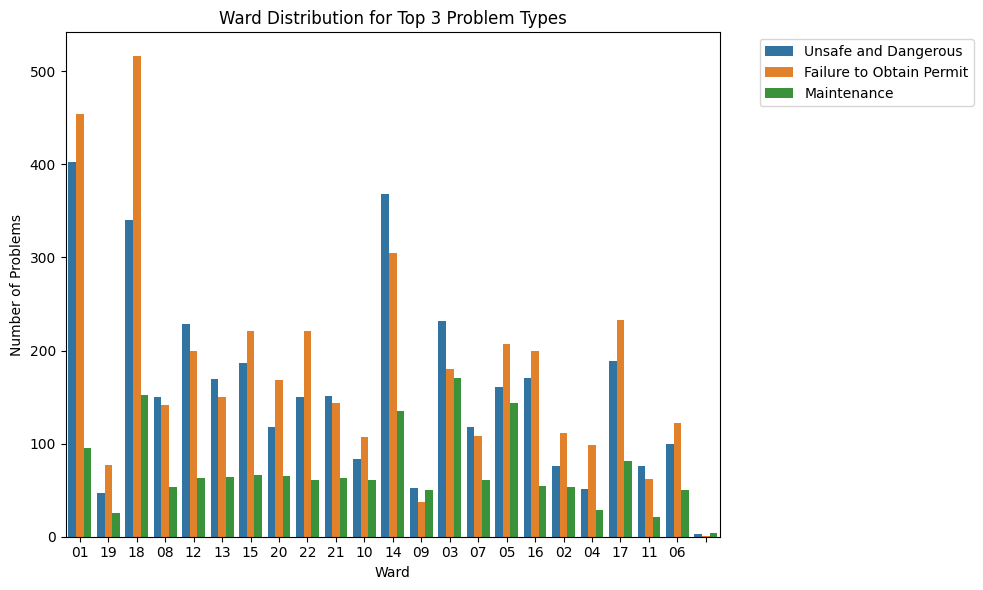

In [34]:
# Question 7 Visualization
# Q7: Ward Distribution for Top 3 Problem Types
plt.figure(figsize=(10,6))
sns.countplot(
    x='ward',
    hue='description',
    data=bostondata[bostondata['description'].isin(top3)],
    dodge=True
)
plt.title('Ward Distribution for Top 3 Problem Types')
plt.xlabel('Ward')
plt.ylabel('Number of Problems')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title=None)
plt.tight_layout()
plt.show()


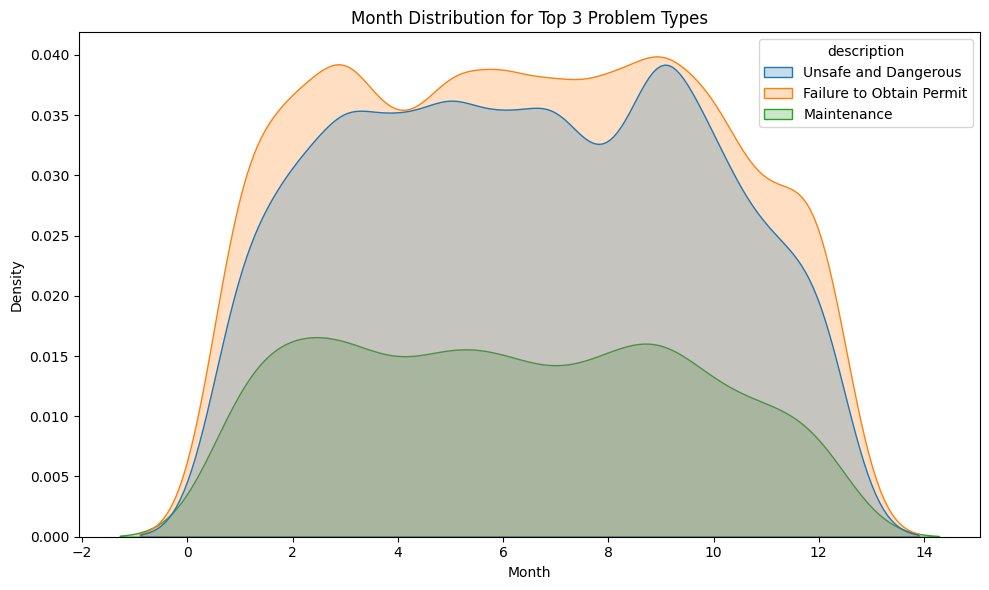

In [32]:
# Question 8 Visualization
# Q8: Month Density for Top 3 Problems
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=subset,
    x='month',
    hue='description',
    fill=True
)
plt.title('Month Distribution for Top 3 Problem Types')
plt.xlabel('Month')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:
Problem frequency: The three types of problems that commonly occur are Failure to Obtain Permit, Unsafe and Dangerous, and Maintenance, which in total add up to over half of all problems recorded.
Seasonal patterns: The rate of “Unsafe and Dangerous” incident creeps up rapidly in June - July, and the “Maintenance” problems rise steadily in March - April; the number of failures to obtain a permit stays relatively high throughout the year.
Ward hotspots: Only a few wards (e.g., Ward 3, Ward 7, Ward 8) have disproportionately high numbers of each of the top problem types which suggests that problems associated with code compliance might be clustered geographically.
Month of year density: Kernel-density plots verify that the different problem types occur in different distributions across the months of the year; life-safety risks happen every summer, maintenance issues occur each spring. This indicates that the problem areas and problems types have some seasonal or established aspect.
Insight for action: Focusing on inspections and outreach to specific wards during these peak times, and focused efforts around landlord education around when permits are required, are likely to yield the largest improvements.

